# Generation des graphiques pour l'algorhitme Génétique

## Sommaire

- [initialisation et import](#initialisation-et-import-necessaire)

### Pour les SAD à 1000000 élémets
- 12
    - [taille de la population / taux de mutation](#100-12-pop-mut)
    - [ajustement nombre d'iteration](#100-12-iter)
    - [calcul du temps d'execution](#100-12-time)
- 13
    - [taille de la population / taux de mutation](#100-13-pop-mut)
    - [ajustement nombre d'iteration](#100-13-iter)
    - [calcul du temps d'execution](#100-13-time)
    - [test new_mutation](#100-13-new_mut)
- 15
    - [taille de la population / taux de mutation](#100-15-pop-mut)
    - [ajustement nombre d'iteration](#100-15-iter)
    - [calcul du temps d'execution](#100-15-time)


### Pour les SAD à 1000 élémets
- 12
    - [taille de la population / taux de mutation](#1000-12-pop-mut)
    - [ajustement nombre d'iteration](#1000-12-iter)
    - [calcul du temps d'execution](#1000-12-time)
- 13
    - [taille de la population / taux de mutation](#1000-13-pop-mut)
    - [ajustement nombre d'iteration](#1000-13-iter)
    - [calcul du temps d'execution](#1000-13-time)
    - [test new_mutation](#1000-13-new_mut)
- 15
    - [taille de la population / taux de mutation](#1000-15-pop-mut)
    - [ajustement nombre d'iteration](#1000-15-iter)
    - [calcul du temps d'execution](#1000-15-time)

### Pour les SAD à 10000 élémets
12
- test
- test

13
- test
- test

15
- test
- test

## initialisation et import necessaire

initialisation des SAD, import des libraries et calcule de la fitness optimal par solver KNAPSACK_DIVIDE_AND_CONQUER_SOLVER de ortools.algorithms.python.knapsack_solver.

[<-- Sommaire](#sommaire)

In [2]:
import tools.parser as parser
from tools.SadObject import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *
from tools.Genetique_solver import Genetique_solver,variateur_genetique
from tools.testor import *

import numpy as np
import matplotlib.pyplot as plt

sad_12_100 = parser.loadFromFile("Data/pi-12-100-1000-001.kna")
sad_13_100 = parser.loadFromFile("Data/pi-13-100-1000-001.kna")
sad_15_100 = parser.loadFromFile("Data/pi-15-100-1000-001.kna")

sad_12_1000 = parser.loadFromFile("Data/pi-12-1000-1000-001.kna")
sad_13_1000 = parser.loadFromFile("Data/pi-13-1000-1000-001.kna")
sad_15_1000 = parser.loadFromFile("Data/pi-15-1000-1000-001.kna")

sad_12_10000 = parser.loadFromFile("Data/pi-12-10000-1000-001.kna")
sad_13_10000 = parser.loadFromFile("Data/pi-13-10000-1000-001.kna")
sad_15_10000 = parser.loadFromFile("Data/pi-15-10000-1000-001.kna")


sol_opti_12_100,_ = Other_solver(sad_12_100).solve()
sol_opti_13_100,_ = Other_solver(sad_13_100).solve()
sol_opti_15_100,_ = Other_solver(sad_15_100).solve()

sol_opti_12_1000,_ = Other_solver(sad_12_1000).solve()
sol_opti_13_1000,_ = Other_solver(sad_13_1000).solve()
sol_opti_15_1000,_ = Other_solver(sad_15_1000).solve()

sol_opti_12_10000,_ = Other_solver(sad_12_10000).solve()
sol_opti_13_10000,_ = Other_solver(sad_13_10000).solve()
sol_opti_15_10000,_ = Other_solver(sad_15_10000).solve()

print("les solutions optimales sont probablement :")
print("pour le 12_100 :   ",sol_opti_12_100)
print("pour le 13_100 :   ",sol_opti_13_100)
print("pour le 15_100 :   ",sol_opti_15_100)
print("pour le 12_1000 :  ",sol_opti_12_1000)
print("pour le 13_1000 :  ",sol_opti_13_1000)
print("pour le 15_1000 :  ",sol_opti_15_1000)
print("pour le 12_10000 : ",sol_opti_12_10000)
print("pour le 13_10000 : ",sol_opti_13_10000)
print("pour le 15_10000 : ",sol_opti_15_10000)

load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\ortools.dll...


loading file: 100%|██████████| 100/100 [00:00<?, ?lines/s] 
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 495klines/s]
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 495klines/s]
loading file: 100%|██████████| 1.00k/1.00k [00:00<00:00, 709klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 648klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 610klines/s]
loading file: 100%|██████████| 10.0k/10.0k [00:00<00:00, 684klines/s]


les solutions optimales sont probablement :
pour le 12_100 :    970
pour le 13_100 :    1989
pour le 15_100 :    1011
pour le 12_1000 :   4514
pour le 13_1000 :   6513
pour le 15_1000 :   4950
pour le 12_10000 :  45105
pour le 13_10000 :  64077
pour le 15_10000 :  50622


# NOMBRE D' OBJETS = 100

## Data n°12

### 100-12-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

[0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01, 0.0105, 0.011, 0.0115]


calcul: 100%|██████████| 25/25 [00:07<00:00,  3.54batch/s]


matrix =  [[865.85, 900.45, 890.4, 898.7, 896.45, 908.4, 908.4, 912.2, 902.0, 912.55, 912.55, 912.55, 913.05, 920.5, 910.3, 906.85, 917.4, 916.35, 919.3, 914.8, 915.65, 916.7, 918.6, 912.2, 920.85], [878.5, 894.55, 902.0, 904.4, 898.7, 908.75, 912.55, 902.35, 912.2, 916.7, 906.85, 914.45, 916.35, 911.85, 911.35, 914.45, 922.4, 921.2, 916.7, 912.55, 914.1, 921.2, 920.15, 920.85, 921.2], [891.95, 903.2, 902.0, 902.85, 910.65, 910.65, 908.75, 914.8, 917.4, 914.8, 921.2, 906.5, 916.0, 920.85, 917.05, 917.05, 925.0, 920.85, 918.6, 923.1, 922.75, 918.6, 915.65, 923.1, 923.1], [895.6, 902.35, 904.6, 903.9, 900.45, 902.7, 916.7, 918.95, 914.8, 919.3, 918.25, 919.3, 918.95, 915.15, 919.3, 925.0, 921.2, 923.1, 923.1, 923.1, 925.0, 922.4, 925.0, 920.85, 923.1], [881.95, 907.7, 909.1, 908.4, 905.3, 913.25, 918.95, 918.95, 912.55, 910.65, 921.2, 923.1, 918.95, 921.2, 918.6, 919.3, 925.0, 916.7, 921.2, 920.85, 922.75, 923.1, 925.0, 922.75, 921.2], [896.3, 901.15, 891.45, 910.3, 913.25, 914.45, 908.4

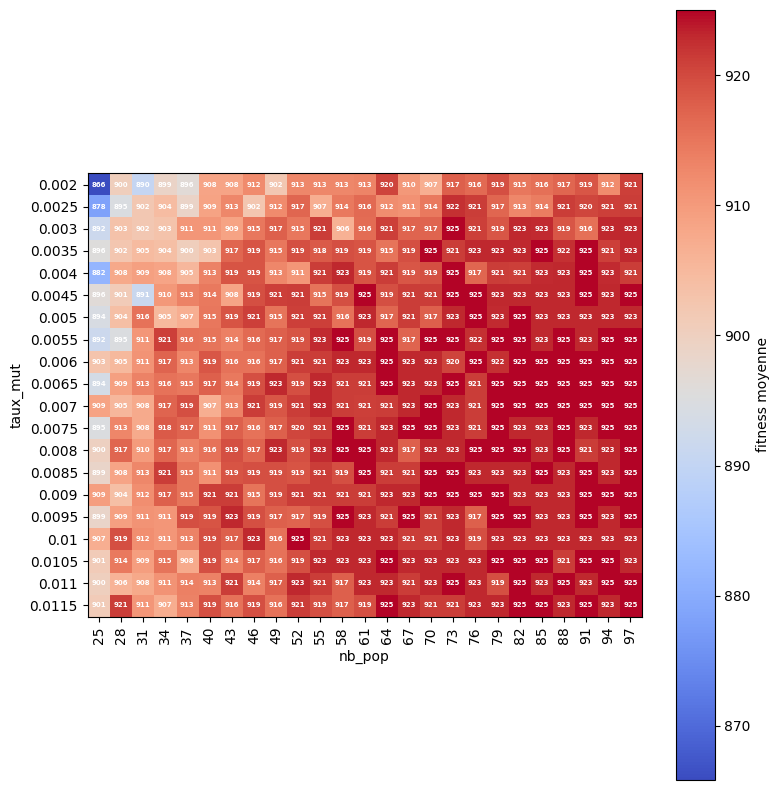

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(25,100,3)
title = ""
avg = []

iterator2 = np.arange(0.002,0.012,0.0005)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_12_100,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

### 100-12-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 38/38 [00:17<00:00,  2.23batch/s]


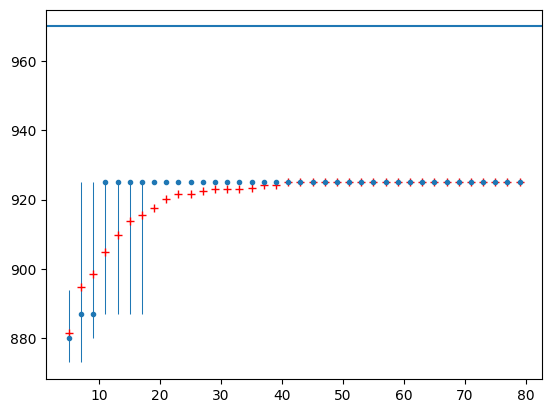

In [39]:
nb_iter = 0
nb_pop = 70
mutation_rate = 0.007

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(5,80,2)
title = ""

test = Testor(Genetique_solver(sad_12_100,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_100,title)

### 100-12-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [110]:
nb_iter = 30
nb_pop = 70
mutation_rate = 0.007

times = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_12_100,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))

temps d'exécution moyen : 0.024940171241760255
temps d'exécution médian : 0.02456796169281006
temps d'exécution max : 0.03580117225646973
temps d'exécution min : 0.023177623748779297
temps d'exécution écart type : 0.0019118246880726363


## Data n°13

### 100-13-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

[0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.00325, 0.0035, 0.00375, 0.004, 0.00425, 0.0045, 0.00475, 0.005, 0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.0065, 0.00675, 0.007, 0.00725, 0.0075, 0.00775, 0.008, 0.00825, 0.0085, 0.00875]


calcul: 100%|██████████| 25/25 [00:06<00:00,  4.10batch/s]


matrix =  [[1733.55, 1770.6, 1809.6, 1829.1, 1875.9, 1834.95, 1850.55, 1912.95, 1909.05, 1922.7, 1951.95, 1875.9, 1953.9, 1965.6, 1930.5, 1969.5, 1930.5, 1963.65, 1965.6, 1969.5, 1969.5, 1969.5, 1965.6, 1973.4, 1983.15], [1790.1, 1795.95, 1815.45, 1756.95, 1772.55, 1827.15, 1905.15, 1920.75, 1912.95, 1950.0, 1897.35, 1948.05, 1971.45, 1959.75, 1973.4, 1963.65, 1963.65, 1959.75, 1961.7, 1987.05, 1951.95, 1989.0, 1989.0, 1981.2, 1981.2], [1782.3, 1823.25, 1823.25, 1848.6, 1864.2, 1858.35, 1893.45, 1938.3, 1907.1, 1950.0, 1909.05, 1969.5, 1950.0, 1953.9, 1973.4, 1950.0, 1981.2, 1959.75, 1953.9, 1985.1, 1989.0, 1973.4, 1979.25, 1981.2, 1989.0], [1823.25, 1788.15, 1909.05, 1821.3, 1911.0, 1889.55, 1914.9, 1936.35, 1938.3, 1938.3, 1926.6, 1961.7, 1938.3, 1951.95, 1951.95, 1981.2, 1979.25, 1979.25, 1946.1, 1981.2, 1989.0, 1983.15, 1983.15, 1989.0, 1989.0], [1875.9, 1866.15, 1901.25, 1918.8, 1850.55, 1922.7, 1946.1, 1938.3, 1953.9, 1957.8, 1969.5, 1940.25, 1985.1, 1981.2, 1953.9, 1971.45, 1979

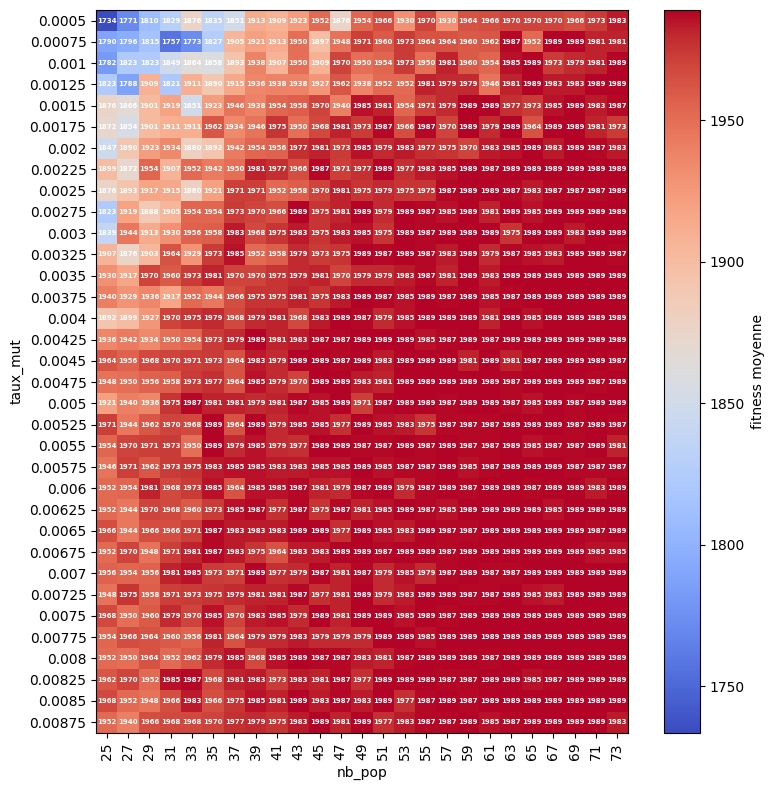

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(25,75,2)
title = ""
avg = []

iterator2 = np.arange(0.0005,0.009,0.00025)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_100,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

### 100-13-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 30/30 [00:11<00:00,  2.69batch/s]


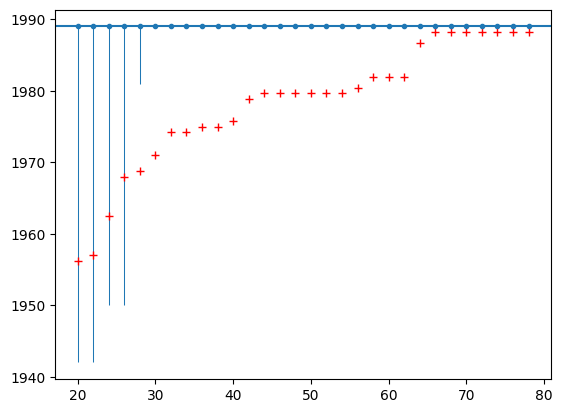

In [ ]:
nb_iter = 0
nb_pop = 40
mutation_rate = 0.006

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(20,80,2)
title = ""

test = Testor(Genetique_solver(sad_13_100,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_13_100,title)

### 100-13-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [111]:
nb_iter = 60
nb_pop = 40
mutation_rate = 0.006

times = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_13_100,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))

temps d'exécution moyen : 0.03058197259902954
temps d'exécution médian : 0.029920101165771484
temps d'exécution max : 0.04410433769226074
temps d'exécution min : 0.02779698371887207
temps d'exécution écart type : 0.002548711525790221


### 100-13-new_mut

test de la methode new_mutation_solve

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 25/25 [00:07<00:00,  3.43batch/s]


matrix =  [[874.85, 833.15, 865.15, 887.5, 868.0, 899.35, 916.95, 911.65, 919.2, 902.1, 900.5, 894.55, 943.75, 934.55, 940.75, 924.15, 926.3, 938.05, 955.6, 961.4, 944.65, 962.75, 959.5, 975.4, 954.55], [900.05, 877.0, 897.5, 910.05, 938.7, 905.35, 933.1, 932.25, 934.9, 922.95, 959.2, 937.55, 966.3, 938.8, 962.6, 968.3, 963.1, 965.75, 960.3, 950.0, 971.7, 961.4, 977.35, 959.05, 983.25], [878.6, 897.4, 926.7, 947.25, 940.3, 965.5, 962.1, 931.1, 964.4, 979.2, 947.0, 958.3, 975.9, 967.1, 949.45, 975.2, 981.5, 978.65, 960.9, 1000.8, 967.55, 978.3, 992.25, 985.85, 1005.55], [918.0, 918.75, 970.55, 946.65, 955.45, 945.0, 973.65, 975.3, 968.35, 971.5, 953.9, 978.75, 983.1, 987.35, 989.9, 991.85, 992.65, 993.05, 1010.65, 972.45, 1007.75, 975.6, 1008.8, 996.8, 1026.7], [948.8, 959.35, 963.1, 958.15, 969.15, 991.2, 987.6, 972.8, 997.05, 990.45, 981.35, 983.3, 978.9, 995.1, 1015.85, 996.85, 1031.35, 1000.05, 1010.6, 1039.35, 1025.95, 1045.35, 1027.9, 1028.4, 1010.05], [965.8, 1001.55, 971.3, 981.

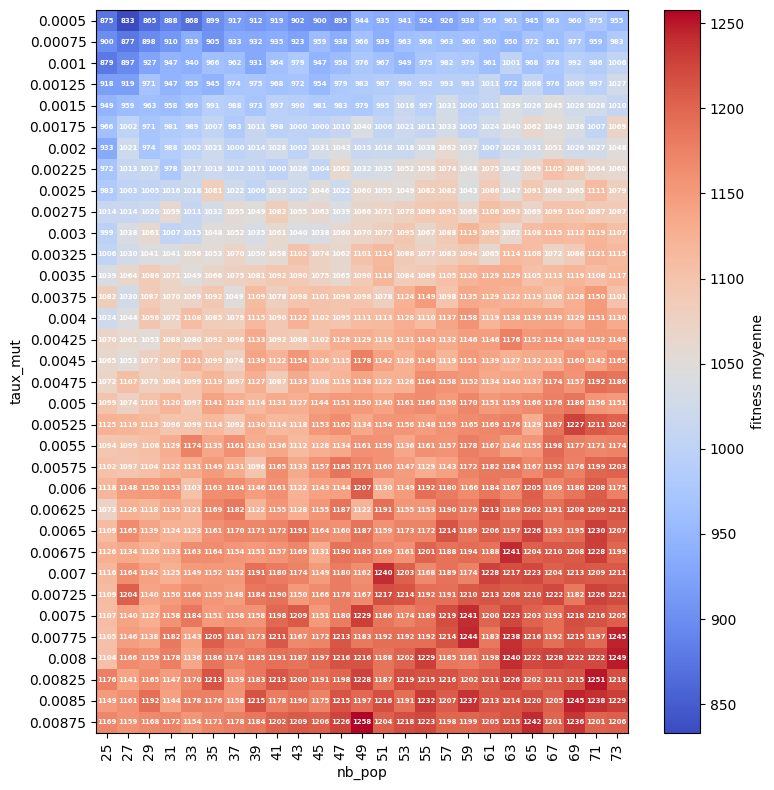

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(25,75,2)
title = ""
avg = []

iterator2 = np.arange(0.0005,0.009,0.00025)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_100,nb_iter,0,mutation_rate,1,"new_mutation"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

on essaie d'aller voir plus loin dans les taux de mutation plus elevé :

calcul: 100%|██████████| 25/25 [00:08<00:00,  2.87batch/s]


matrix =  [[1205.25, 1159.25, 1183.45, 1196.0, 1209.85, 1186.5, 1206.25, 1225.0, 1206.1, 1208.9, 1187.5, 1216.4, 1204.0, 1226.5, 1250.7, 1224.5, 1209.9, 1256.9, 1248.5, 1240.45, 1257.45, 1239.7, 1280.9, 1265.25, 1233.0], [1216.4, 1250.0, 1215.95, 1291.95, 1218.85, 1269.9, 1261.6, 1265.9, 1255.55, 1307.85, 1289.6, 1234.8, 1256.35, 1276.55, 1299.15, 1303.75, 1331.55, 1294.2, 1323.85, 1314.65, 1323.8, 1314.55, 1322.45, 1340.6, 1299.35], [1249.95, 1247.4, 1286.35, 1305.2, 1289.75, 1296.45, 1328.55, 1283.25, 1285.6, 1301.3, 1333.6, 1319.5, 1326.5, 1364.05, 1318.65, 1338.9, 1309.0, 1312.8, 1370.3, 1335.25, 1351.75, 1354.1, 1319.25, 1353.9, 1355.65], [1334.45, 1273.6, 1352.55, 1329.35, 1311.85, 1340.6, 1323.3, 1350.2, 1384.9, 1335.5, 1344.05, 1386.0, 1323.45, 1370.35, 1392.1, 1357.2, 1343.25, 1378.5, 1426.35, 1488.3, 1372.1, 1387.05, 1336.2, 1392.2, 1402.9], [1282.55, 1308.35, 1323.3, 1370.1, 1367.7, 1389.8, 1351.35, 1402.65, 1378.85, 1394.8, 1367.75, 1402.4, 1370.95, 1406.25, 1427.6, 1382.5,

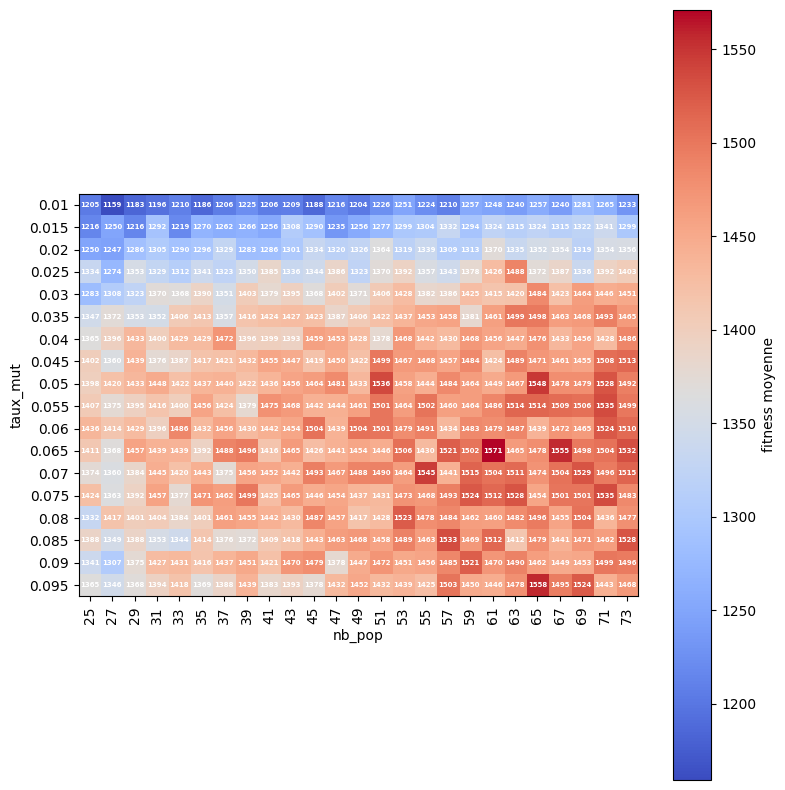

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(25,75,2)
title = ""
avg = []

iterator2 = np.arange(0.01,0.1,0.005)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_100,nb_iter,0,mutation_rate,1,"new_mutation"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

on trouve de meilleur resultat avec un taux de mutation de 6%. Mais c'est encore bien en dessous des resultats obtenus avec classic_solve.

## Data n°15

### 100-15-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 23/23 [00:04<00:00,  5.39batch/s]


matrix =  [[828.12, 895.2, 884.76, 924.06, 920.82, 934.26, 918.0, 954.84, 967.26, 968.1, 960.12, 968.16, 976.56, 975.3, 984.66, 985.02, 983.76, 986.04, 983.64, 982.5, 984.12, 990.12, 988.38], [779.1, 899.16, 866.28, 957.54, 947.4, 945.96, 958.74, 962.1, 969.66, 981.72, 981.66, 963.72, 978.84, 983.28, 981.48, 989.82, 987.6, 987.24, 985.44, 986.88, 993.48, 991.92, 992.04], [835.26, 921.48, 908.52, 970.92, 940.5, 967.5, 946.8, 981.12, 970.74, 985.92, 978.72, 984.72, 984.0, 985.44, 985.68, 986.52, 991.14, 985.74, 988.56, 992.94, 992.28, 993.72, 992.7], [805.68, 915.36, 921.12, 964.14, 967.98, 944.04, 966.72, 982.86, 971.82, 986.1, 984.9, 985.74, 985.5, 990.54, 988.08, 992.88, 991.74, 991.02, 990.96, 994.56, 991.74, 993.0, 992.64], [851.46, 950.1, 935.04, 946.8, 957.12, 959.16, 968.88, 979.08, 977.76, 982.26, 985.98, 988.32, 990.84, 987.12, 988.8, 990.96, 991.98, 990.72, 991.98, 991.44, 993.84, 993.36, 992.82], [892.32, 948.06, 902.04, 940.8, 958.92, 958.2, 976.98, 971.4, 984.54, 989.4, 990

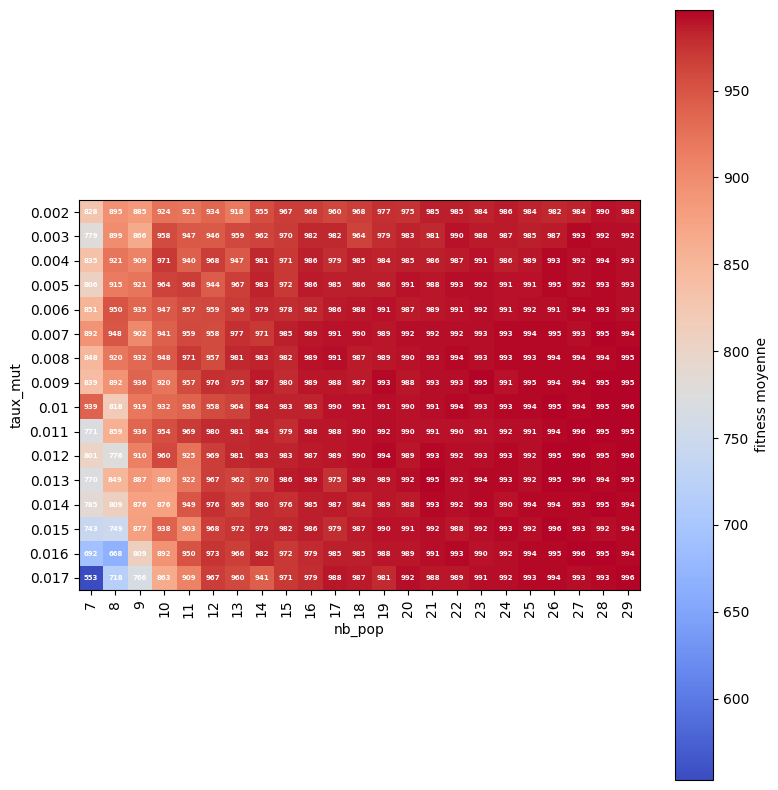

In [78]:
nb_iter = 20
group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(7,30,1)
title = ""
avg = []

iterator2 = np.arange(0.002,0.018,0.001)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_15_100,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 40/40 [00:08<00:00,  4.97batch/s]


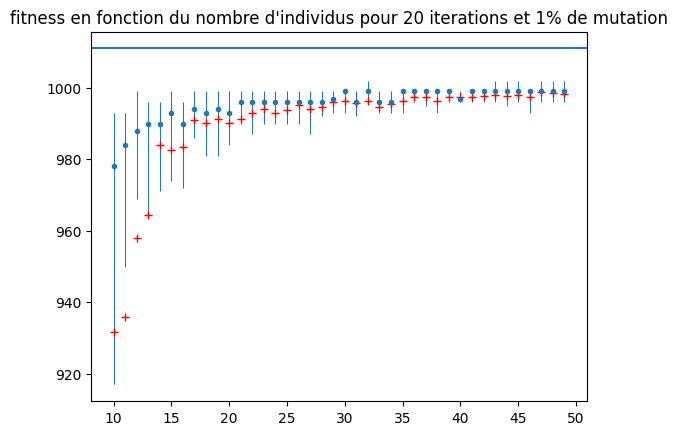

In [80]:
nb_iter = 20
nb_pop = 0 # parametre qui varie
mutation_rate = 0.01

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(10,50,1)
title = "fitness en fonction du nombre d'individus pour 20 iterations et 1% de mutation"

test = Testor(Genetique_solver(sad_15_100,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_15_100,title)

### 100-15-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 38/38 [00:09<00:00,  4.00batch/s]


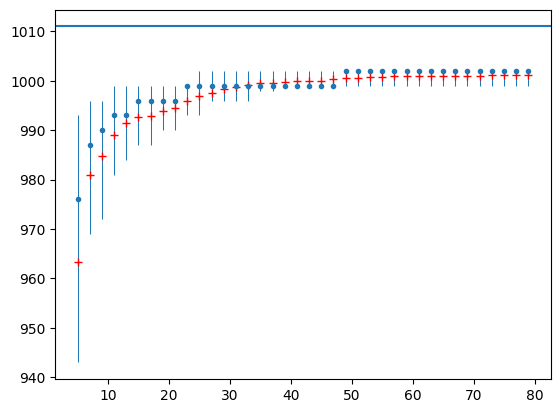

In [63]:
nb_iter = 0
nb_pop = 25
mutation_rate = 0.01

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(5,80,2)
title = ""

test = Testor(Genetique_solver(sad_15_100,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_15_100,title)

### 100-15-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [112]:
nb_iter = 30
nb_pop = 25
mutation_rate = 0.01

times = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_15_100,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))

temps d'exécution moyen : 0.009738726615905762
temps d'exécution médian : 0.00933229923248291
temps d'exécution max : 0.0197446346282959
temps d'exécution min : 0.007144451141357422
temps d'exécution écart type : 0.001900860846465206


# NOMBRE D' OBJETS = 1000

## Data n°12

### 1000-12-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 10/10 [00:04<00:00,  2.09batch/s]


matrix =  [[4420.38, 4420.04, 4450.88, 4455.92, 4454.12, 4447.28, 4457.84, 4467.8, 4466.9, 4462.52], [4428.94, 4431.66, 4441.06, 4445.36, 4457.44, 4460.0, 4456.46, 4474.16, 4467.94, 4470.86], [4417.56, 4429.6, 4450.32, 4445.18, 4463.72, 4457.58, 4462.96, 4465.8, 4468.84, 4471.96], [4432.82, 4426.76, 4444.38, 4444.52, 4453.36, 4457.58, 4459.1, 4470.1, 4465.04, 4467.96], [4416.32, 4423.08, 4435.32, 4449.14, 4448.66, 4462.14, 4458.4, 4469.66, 4458.48, 4466.22], [4415.2, 4432.02, 4452.26, 4449.9, 4462.84, 4453.9, 4454.96, 4469.26, 4462.56, 4469.74], [4420.36, 4421.84, 4449.56, 4436.78, 4449.42, 4452.74, 4466.22, 4468.36, 4470.92, 4464.2], [4414.7, 4430.62, 4434.82, 4441.4, 4462.56, 4455.5, 4453.16, 4468.08, 4475.62, 4461.66], [4420.92, 4442.42, 4433.38, 4444.44, 4465.18, 4448.1, 4466.16, 4463.74, 4459.1, 4471.54], [4415.06, 4441.38, 4441.9, 4432.62, 4459.24, 4458.14, 4455.2, 4474.52, 4469.82, 4468.78]]
x_ticks =  [40, 46, 52, 58, 64, 70, 76, 82, 88, 94]
y_ticks =  [0.0, 5e-06, 1e-05, 1.5e-

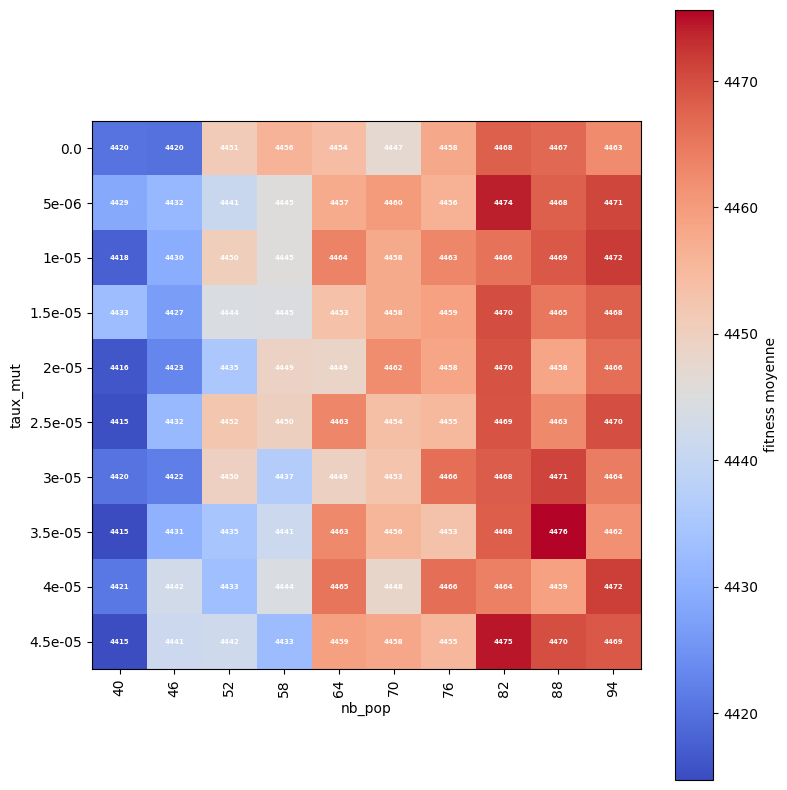

In [83]:
nb_iter = 30
group_size = 50 # nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(40,100,6)
title = ""
avg = []

iterator2 = np.arange(0,0.00005,0.000005)
iterator2 = [round(x, 7) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_12_1000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 200/200 [01:33<00:00,  2.13batch/s]


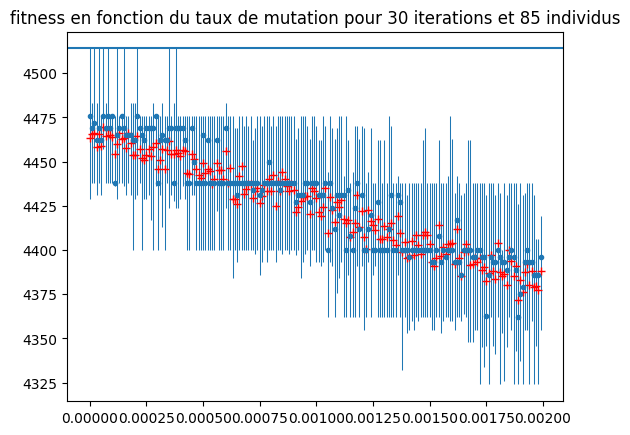

In [86]:
nb_iter = 30
nb_pop = 85
mutation_rate = 0

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.mutation_rate()
iterator1 = np.arange(0,0.002,0.00001)
title = "fitness en fonction du taux de mutation pour 30 iterations et 85 individus"

test = Testor(Genetique_solver(sad_12_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_1000,title)

calcul: 100%|██████████| 40/40 [00:55<00:00,  1.39s/batch]


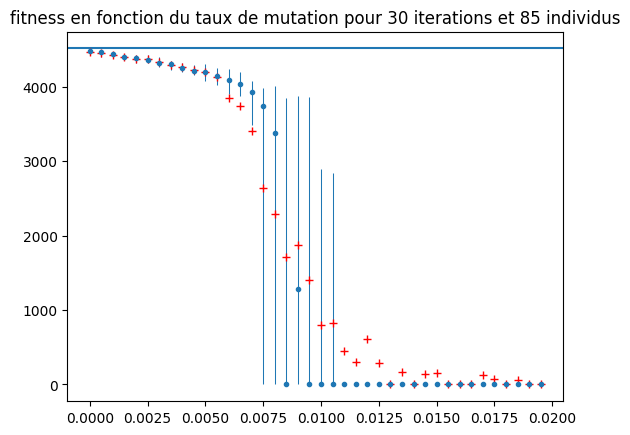

In [87]:
nb_iter = 30
nb_pop = 85
mutation_rate = 0

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.mutation_rate()
iterator1 = np.arange(0,0.02,0.0005)
title = "fitness en fonction du taux de mutation pour 30 iterations et 85 individus"

test = Testor(Genetique_solver(sad_12_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_1000,title)

### 1000-12-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 38/38 [00:11<00:00,  3.18batch/s]


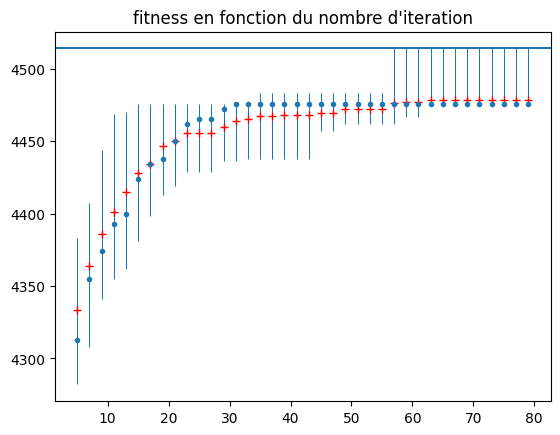

In [88]:
nb_iter = 0
nb_pop = 85
mutation_rate = 0 

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(5,80,2)
title = "fitness en fonction du nombre d'iteration"

test = Testor(Genetique_solver(sad_12_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_1000,title)

calcul: 100%|██████████| 45/45 [01:00<00:00,  1.34s/batch]


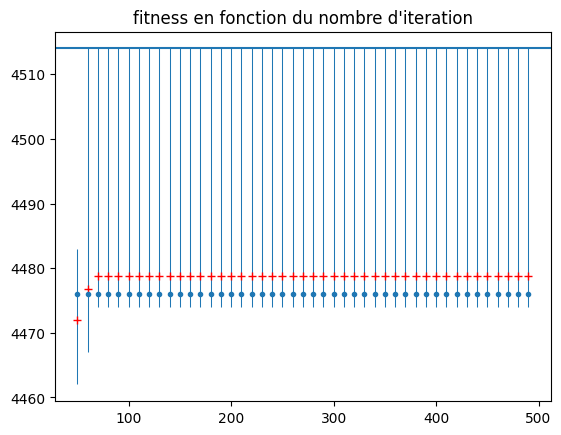

In [91]:
nb_iter = 0
nb_pop = 85
mutation_rate = 0 

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(50,500,10)
title = "fitness en fonction du nombre d'iteration"

test = Testor(Genetique_solver(sad_12_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_1000,title)

### 1000-12-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [108]:
nb_iter = 30
nb_pop = 85
mutation_rate = 0

times = []
fit = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_12_1000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))

print("fitness moyenne :", np.mean(fit))

temps d'exécution moyen : 0.03463073968887329
temps d'exécution médian : 0.03409171104431152
temps d'exécution max : 0.06390643119812012
temps d'exécution min : 0.031719207763671875
temps d'exécution écart type : 0.003508955015293868
fitness moyenne : 4464.91


## Data n°13

### 1000-13-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 10/10 [00:13<00:00,  1.31s/batch]


matrix =  [[6171.75, 6152.25, 6294.6, 6282.9, 6325.8, 6335.55, 6318.0, 6378.45, 6397.95, 6431.1], [6257.55, 6294.6, 6302.4, 6397.95, 6436.95, 6466.2, 6396.0, 6450.6, 6456.45, 6483.75], [6300.45, 6357.0, 6396.0, 6442.8, 6415.5, 6394.05, 6413.55, 6448.65, 6429.15, 6450.6], [6284.85, 6333.6, 6399.9, 6378.45, 6399.9, 6419.4, 6419.4, 6454.5, 6456.45, 6417.45], [6247.8, 6298.5, 6321.9, 6341.4, 6392.1, 6415.5, 6433.05, 6407.7, 6382.35, 6438.9], [6238.05, 6222.45, 6261.45, 6325.8, 6339.45, 6298.5, 6378.45, 6374.55, 6397.95, 6343.35], [6117.15, 6179.55, 6292.65, 6259.5, 6271.2, 6306.3, 6306.3, 6335.55, 6312.15, 6388.2], [6150.3, 6105.45, 6191.25, 6197.1, 6185.4, 6253.65, 6245.85, 6314.1, 6296.55, 6351.15], [6004.05, 6121.05, 6162.0, 6072.3, 6119.1, 6169.8, 6197.1, 6189.3, 6304.35, 6257.55]]
x_ticks =  [70, 78, 86, 94, 102, 110, 118, 126, 134, 142]
y_ticks =  [0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018]
title1 = " nb_pop "
title2 = " taux_mut "
title = "  "


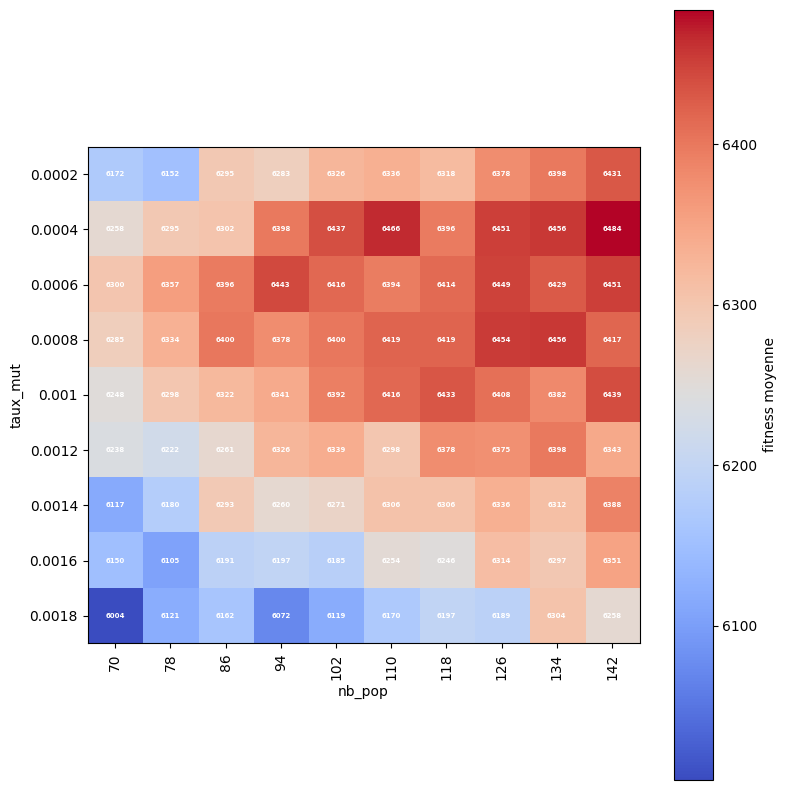

In [ ]:
nb_iter = 100
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(70,150,8)
title = ""
avg = []

iterator2 = np.arange(0,0.0020,0.0002)
iterator2 = [round(x, 7) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_1000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 10/10 [00:11<00:00,  1.12s/batch]


matrix =  [[6267.3, 6337.5, 6380.4, 6397.95, 6417.45, 6433.05, 6444.75, 6468.15, 6472.05, 6440.85], [6331.65, 6327.75, 6374.55, 6417.45, 6413.55, 6362.85, 6438.9, 6456.45, 6448.65, 6456.45], [6280.95, 6368.7, 6349.2, 6409.65, 6397.95, 6396.0, 6396.0, 6458.4, 6460.35, 6472.05], [6327.75, 6384.3, 6343.35, 6386.25, 6396.0, 6436.95, 6458.4, 6427.2, 6435.0, 6452.55], [6331.65, 6308.25, 6386.25, 6396.0, 6405.75, 6411.6, 6440.85, 6460.35, 6464.25, 6475.95], [6343.35, 6306.3, 6405.75, 6423.3, 6358.95, 6417.45, 6452.55, 6403.8, 6435.0, 6460.35], [6333.6, 6351.15, 6364.8, 6421.35, 6413.55, 6440.85, 6431.1, 6458.4, 6427.2, 6444.75], [6353.1, 6382.35, 6353.1, 6429.15, 6401.85, 6423.3, 6427.2, 6421.35, 6448.65, 6438.9], [6333.6, 6353.1, 6392.1, 6409.65, 6399.9, 6413.55, 6435.0, 6436.95, 6456.45, 6421.35], [6325.8, 6370.65, 6394.05, 6355.05, 6384.3, 6399.9, 6407.7, 6436.95, 6421.35, 6472.05]]
x_ticks =  [70, 78, 86, 94, 102, 110, 118, 126, 134, 142]
y_ticks =  [0.0005, 0.00054, 0.00058, 0.00062, 0.0

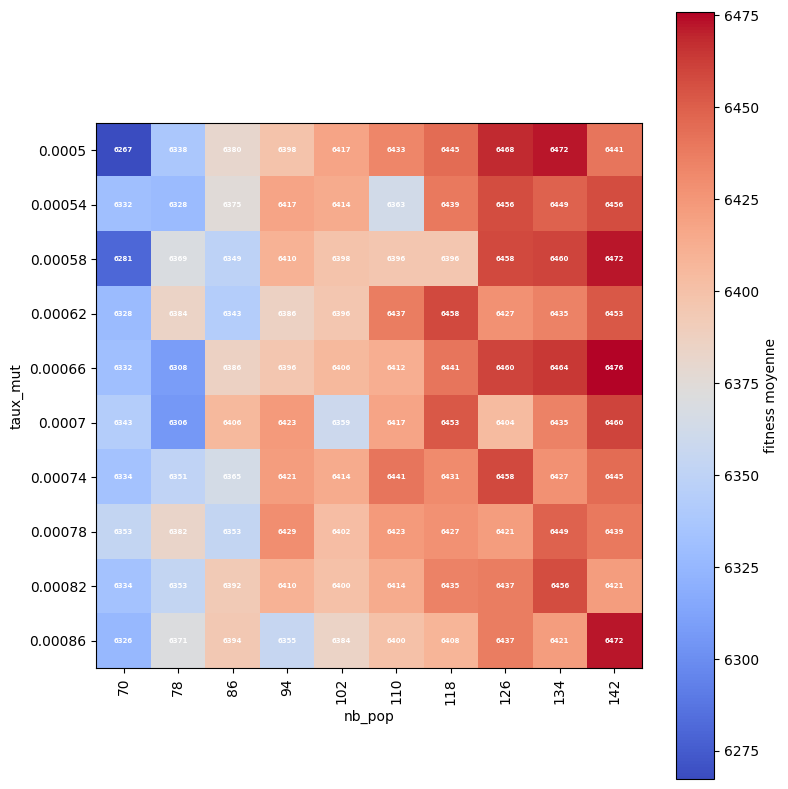

In [120]:
nb_iter = 100
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(70,150,8)
title = ""
avg = []

iterator2 = np.arange(0.0005,0.0009,0.00004)
iterator2 = [round(x, 7) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_1000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 40/40 [05:42<00:00,  8.56s/batch]


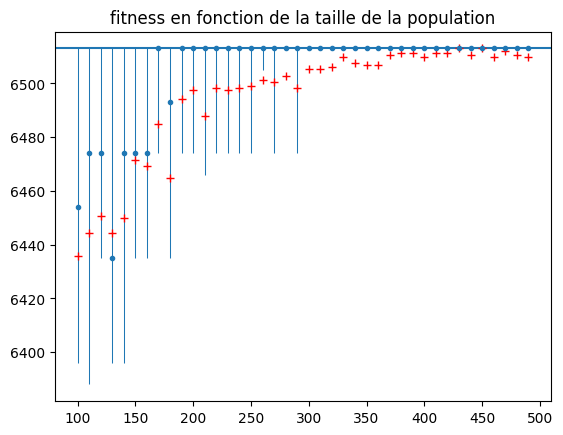

In [121]:
nb_iter = 100
nb_pop = 0
mutation_rate = 0.00055

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(100,500,10)
title = "fitness en fonction de la taille de la population"

test = Testor(Genetique_solver(sad_13_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_13_1000,title)

### 1000-13-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 12/12 [00:23<00:00,  1.94s/batch]


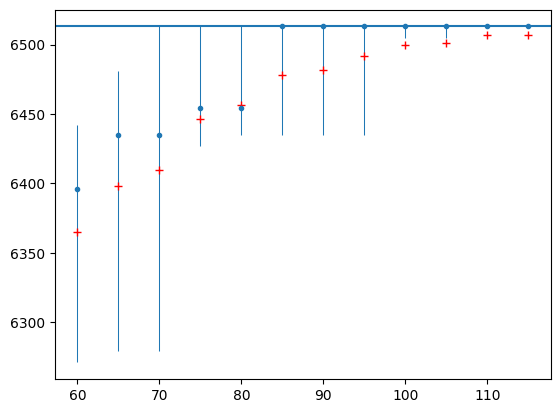

calcul: 100%|██████████| 12/12 [00:27<00:00,  2.33s/batch]


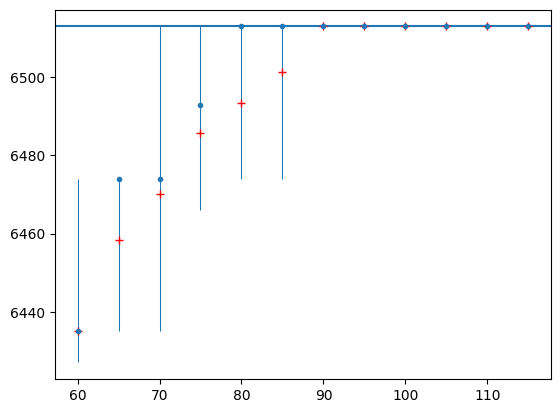

In [3]:
nb_iter = 0
nb_pop = 200
mutation_rate = 0.00055

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(60,120,5)
title = ""

test = Testor(Genetique_solver(sad_13_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_13_1000,title)


nb_iter = 0
nb_pop = 400
mutation_rate = 0.00055

group_size = 10 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(60,120,5)
title = ""

test = Testor(Genetique_solver(sad_13_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_13_1000,title)

### 1000-13-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [17]:
nb_iter = 100
nb_pop = 200
mutation_rate = 0.00055

times = []
fit = []
for i in range(10):
    clock_start = time.time()
    solver = Genetique_solver(sad_13_1000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))
print("fitness moyenne :", np.mean(fit))

nb_iter = 100
nb_pop = 400
mutation_rate = 0.00055

times = []
fit = []
for i in range(50):
    clock_start = time.time()
    solver = Genetique_solver(sad_13_1000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("\ntemps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))
print("fitness moyenne :", np.mean(fit))

temps d'exécution moyen : 0.459840989112854
temps d'exécution médian : 0.4499690532684326
temps d'exécution max : 0.511193037033081
temps d'exécution min : 0.44040846824645996
temps d'exécution écart type : 0.021399980236529226
fitness moyenne : 6489.6

temps d'exécution moyen : 1.1916673517227172
temps d'exécution médian : 1.186038851737976
temps d'exécution max : 1.2542881965637207
temps d'exécution min : 1.1651668548583984
temps d'exécution écart type : 0.018678553810402336
fitness moyenne : 6509.88


## Data n°15

### 1000-15-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 9/9 [00:13<00:00,  1.47s/batch]


matrix =  [[4817.7, 4822.65, 4826.4, 4827.6, 4828.65, 4827.9, 4830.0, 4830.0, 4829.55], [4829.55, 4831.5, 4831.8, 4833.3, 4833.45, 4835.4, 4835.1, 4834.65, 4836.15], [4830.0, 4834.8, 4836.45, 4837.2, 4837.65, 4838.7, 4837.65, 4838.1, 4840.2], [4830.45, 4838.55, 4837.65, 4837.95, 4841.85, 4840.05, 4841.55, 4842.3, 4841.85], [4829.4, 4839.6, 4839.45, 4841.4, 4843.05, 4841.7, 4842.75, 4844.85, 4843.5], [4823.1, 4838.55, 4840.35, 4841.25, 4843.65, 4843.95, 4843.2, 4846.35, 4844.7], [4819.65, 4838.55, 4845.15, 4843.05, 4845.15, 4846.5, 4846.05, 4845.9, 4845.3], [4802.7, 4834.8, 4841.55, 4843.65, 4844.7, 4845.45, 4845.3, 4847.1, 4846.5], [4789.95, 4833.15, 4841.7, 4843.8, 4846.05, 4843.65, 4846.05, 4847.85, 4848.15], [4792.95, 4825.65, 4840.35, 4842.3, 4847.85, 4845.45, 4849.35, 4846.5, 4846.65], [4754.55, 4817.85, 4836.0, 4841.25, 4844.7, 4845.0, 4846.95, 4849.35, 4849.35]]
x_ticks =  [20, 40, 60, 80, 100, 120, 140, 160, 180]
y_ticks =  [0.0, 0.0003, 0.0006, 0.0009, 0.0012, 0.0015, 0.0018, 

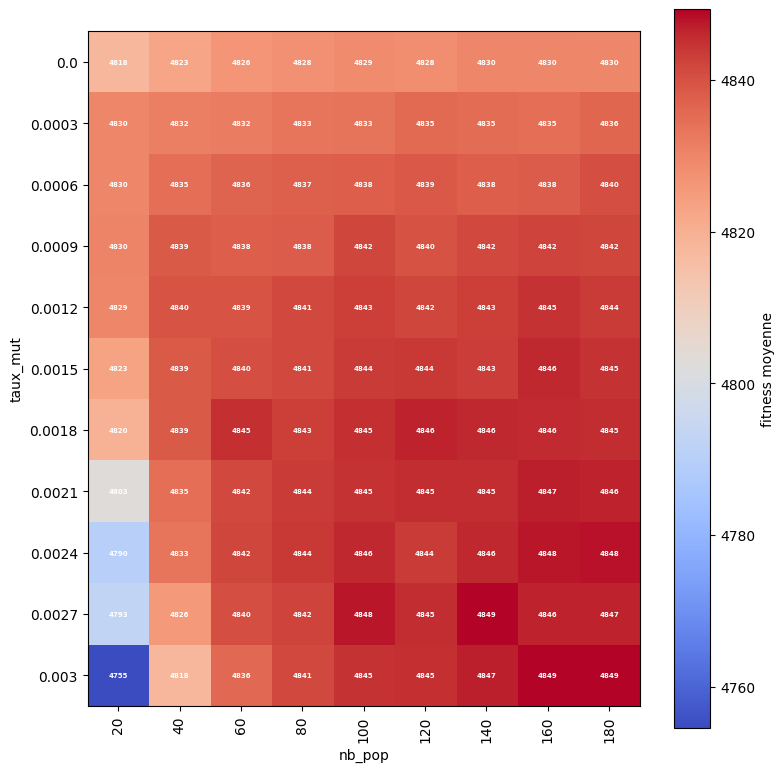

In [21]:
nb_iter = 100
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(20,200,20)
title = ""
avg = []

iterator2 = np.arange(0,0.003,0.0003)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_15_1000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 28/28 [00:26<00:00,  1.07batch/s]


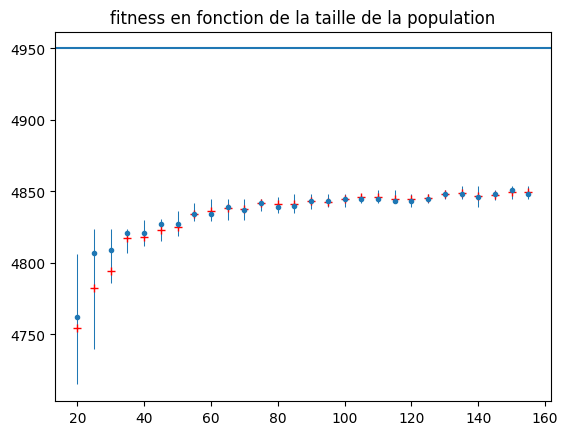

In [26]:
nb_iter = 100
nb_pop = 0
mutation_rate = 0.003

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(20,160,5)
title = "fitness en fonction de la taille de la population"

test = Testor(Genetique_solver(sad_15_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_15_1000,title)

### 1000-15-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 40/40 [00:49<00:00,  1.24s/batch]


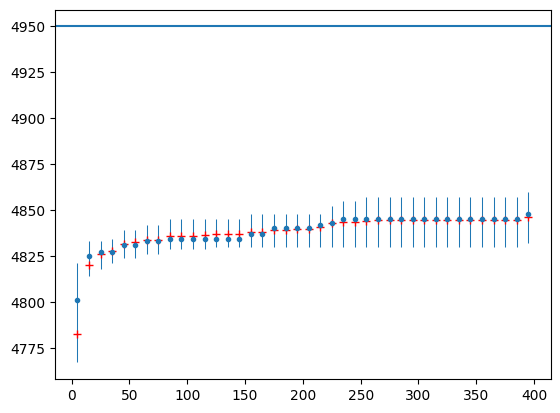

In [27]:
nb_iter = 0
nb_pop = 60
mutation_rate = 0.003

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(5,400,10)
title = ""

test = Testor(Genetique_solver(sad_15_1000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_15_1000,title)

### 1000-15-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [28]:
nb_iter = 230
nb_pop = 60
mutation_rate = 0.003

fit = []
times = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_15_1000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))
print("fitness moyenne :", np.mean(fit))

temps d'exécution moyen : 0.3324978971481323
temps d'exécution médian : 0.3310716152191162
temps d'exécution max : 0.37195849418640137
temps d'exécution min : 0.30655360221862793
temps d'exécution écart type : 0.010943941765282598
fitness moyenne : 4838.52


# NOMBRE D'OBJETS = 10000

## Data n°12

### 10000-12-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 10/10 [00:04<00:00,  2.09batch/s]


matrix =  [[4420.38, 4420.04, 4450.88, 4455.92, 4454.12, 4447.28, 4457.84, 4467.8, 4466.9, 4462.52], [4428.94, 4431.66, 4441.06, 4445.36, 4457.44, 4460.0, 4456.46, 4474.16, 4467.94, 4470.86], [4417.56, 4429.6, 4450.32, 4445.18, 4463.72, 4457.58, 4462.96, 4465.8, 4468.84, 4471.96], [4432.82, 4426.76, 4444.38, 4444.52, 4453.36, 4457.58, 4459.1, 4470.1, 4465.04, 4467.96], [4416.32, 4423.08, 4435.32, 4449.14, 4448.66, 4462.14, 4458.4, 4469.66, 4458.48, 4466.22], [4415.2, 4432.02, 4452.26, 4449.9, 4462.84, 4453.9, 4454.96, 4469.26, 4462.56, 4469.74], [4420.36, 4421.84, 4449.56, 4436.78, 4449.42, 4452.74, 4466.22, 4468.36, 4470.92, 4464.2], [4414.7, 4430.62, 4434.82, 4441.4, 4462.56, 4455.5, 4453.16, 4468.08, 4475.62, 4461.66], [4420.92, 4442.42, 4433.38, 4444.44, 4465.18, 4448.1, 4466.16, 4463.74, 4459.1, 4471.54], [4415.06, 4441.38, 4441.9, 4432.62, 4459.24, 4458.14, 4455.2, 4474.52, 4469.82, 4468.78]]
x_ticks =  [40, 46, 52, 58, 64, 70, 76, 82, 88, 94]
y_ticks =  [0.0, 5e-06, 1e-05, 1.5e-

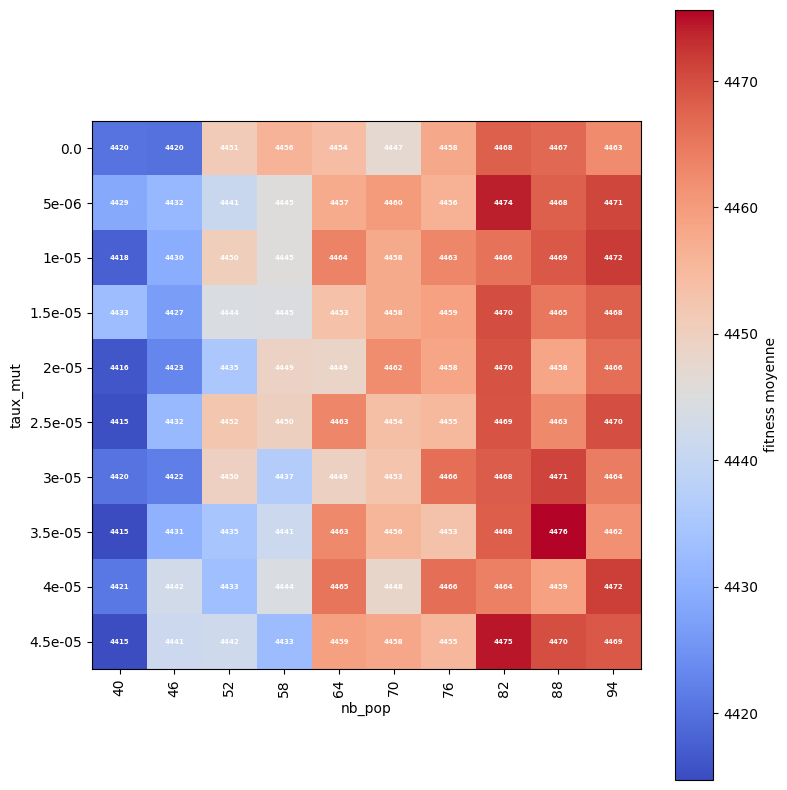

In [ ]:
nb_iter = 30
group_size = 50 # nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(40,100,6)
title = ""
avg = []

iterator2 = np.arange(0,0.00005,0.000005)
iterator2 = [round(x, 7) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_12_10000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 200/200 [01:33<00:00,  2.13batch/s]


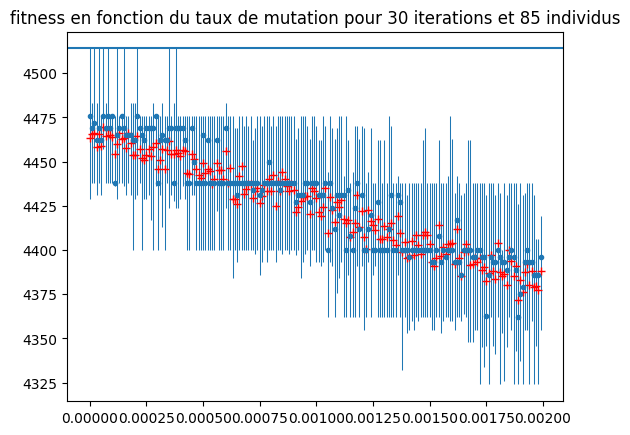

In [ ]:
nb_iter = 30
nb_pop = 85
mutation_rate = 0

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.mutation_rate()
iterator1 = np.arange(0,0.002,0.00001)
title = "fitness en fonction du taux de mutation pour 30 iterations et 85 individus"

test = Testor(Genetique_solver(sad_12_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_10000,title)

calcul: 100%|██████████| 40/40 [00:55<00:00,  1.39s/batch]


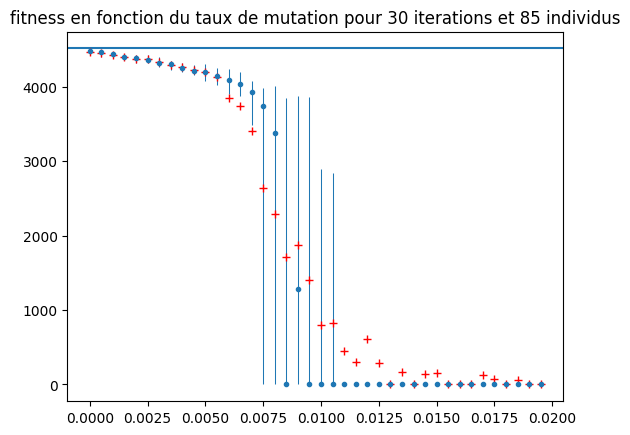

In [ ]:
nb_iter = 30
nb_pop = 85
mutation_rate = 0

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.mutation_rate()
iterator1 = np.arange(0,0.02,0.0005)
title = "fitness en fonction du taux de mutation pour 30 iterations et 85 individus"

test = Testor(Genetique_solver(sad_12_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_10000,title)

### 10000-12-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 38/38 [00:11<00:00,  3.18batch/s]


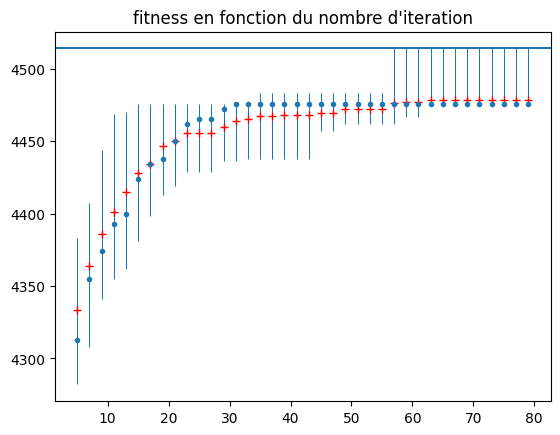

In [ ]:
nb_iter = 0
nb_pop = 85
mutation_rate = 0 

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(5,80,2)
title = "fitness en fonction du nombre d'iteration"

test = Testor(Genetique_solver(sad_12_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_10000,title)

calcul: 100%|██████████| 45/45 [01:00<00:00,  1.34s/batch]


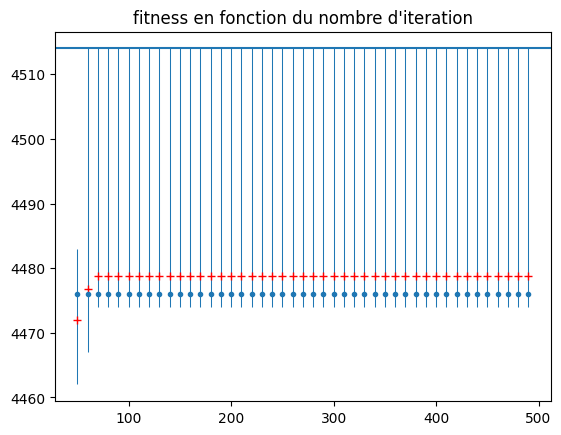

In [ ]:
nb_iter = 0
nb_pop = 85
mutation_rate = 0 

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(50,500,10)
title = "fitness en fonction du nombre d'iteration"

test = Testor(Genetique_solver(sad_12_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_12_10000,title)

### 10000-12-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [ ]:
nb_iter = 30
nb_pop = 85
mutation_rate = 0

times = []
fit = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_12_10000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))

print("fitness moyenne :", np.mean(fit))

temps d'exécution moyen : 0.03463073968887329
temps d'exécution médian : 0.03409171104431152
temps d'exécution max : 0.06390643119812012
temps d'exécution min : 0.031719207763671875
temps d'exécution écart type : 0.003508955015293868
fitness moyenne : 4464.91


## Data n°13

### 10000-13-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 10/10 [00:13<00:00,  1.31s/batch]


matrix =  [[6171.75, 6152.25, 6294.6, 6282.9, 6325.8, 6335.55, 6318.0, 6378.45, 6397.95, 6431.1], [6257.55, 6294.6, 6302.4, 6397.95, 6436.95, 6466.2, 6396.0, 6450.6, 6456.45, 6483.75], [6300.45, 6357.0, 6396.0, 6442.8, 6415.5, 6394.05, 6413.55, 6448.65, 6429.15, 6450.6], [6284.85, 6333.6, 6399.9, 6378.45, 6399.9, 6419.4, 6419.4, 6454.5, 6456.45, 6417.45], [6247.8, 6298.5, 6321.9, 6341.4, 6392.1, 6415.5, 6433.05, 6407.7, 6382.35, 6438.9], [6238.05, 6222.45, 6261.45, 6325.8, 6339.45, 6298.5, 6378.45, 6374.55, 6397.95, 6343.35], [6117.15, 6179.55, 6292.65, 6259.5, 6271.2, 6306.3, 6306.3, 6335.55, 6312.15, 6388.2], [6150.3, 6105.45, 6191.25, 6197.1, 6185.4, 6253.65, 6245.85, 6314.1, 6296.55, 6351.15], [6004.05, 6121.05, 6162.0, 6072.3, 6119.1, 6169.8, 6197.1, 6189.3, 6304.35, 6257.55]]
x_ticks =  [70, 78, 86, 94, 102, 110, 118, 126, 134, 142]
y_ticks =  [0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.0012, 0.0014, 0.0016, 0.0018]
title1 = " nb_pop "
title2 = " taux_mut "
title = "  "


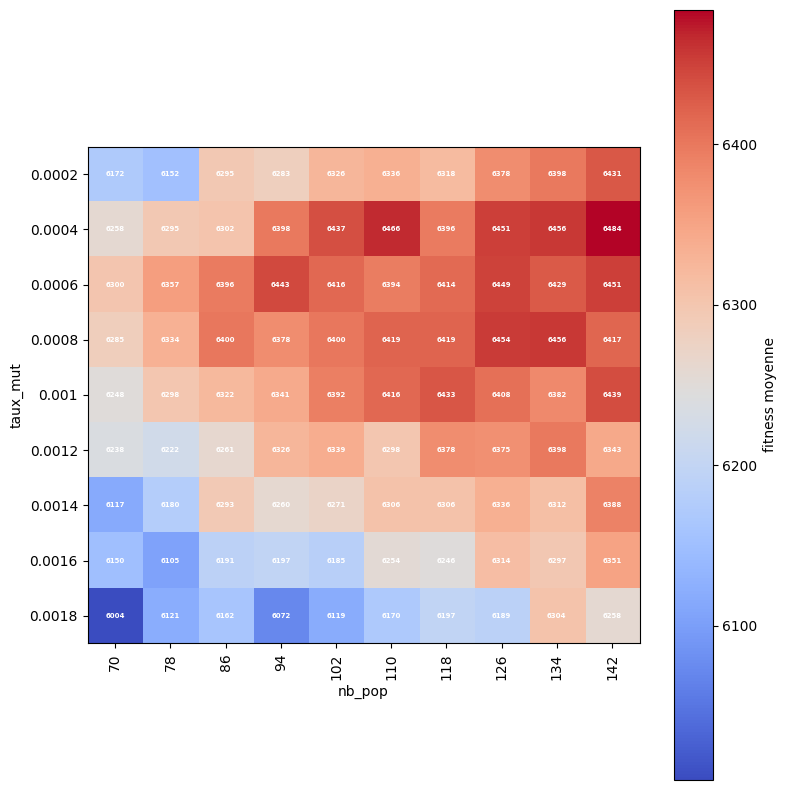

In [ ]:
nb_iter = 100
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(70,150,8)
title = ""
avg = []

iterator2 = np.arange(0,0.0020,0.0002)
iterator2 = [round(x, 7) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_10000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 10/10 [00:11<00:00,  1.12s/batch]


matrix =  [[6267.3, 6337.5, 6380.4, 6397.95, 6417.45, 6433.05, 6444.75, 6468.15, 6472.05, 6440.85], [6331.65, 6327.75, 6374.55, 6417.45, 6413.55, 6362.85, 6438.9, 6456.45, 6448.65, 6456.45], [6280.95, 6368.7, 6349.2, 6409.65, 6397.95, 6396.0, 6396.0, 6458.4, 6460.35, 6472.05], [6327.75, 6384.3, 6343.35, 6386.25, 6396.0, 6436.95, 6458.4, 6427.2, 6435.0, 6452.55], [6331.65, 6308.25, 6386.25, 6396.0, 6405.75, 6411.6, 6440.85, 6460.35, 6464.25, 6475.95], [6343.35, 6306.3, 6405.75, 6423.3, 6358.95, 6417.45, 6452.55, 6403.8, 6435.0, 6460.35], [6333.6, 6351.15, 6364.8, 6421.35, 6413.55, 6440.85, 6431.1, 6458.4, 6427.2, 6444.75], [6353.1, 6382.35, 6353.1, 6429.15, 6401.85, 6423.3, 6427.2, 6421.35, 6448.65, 6438.9], [6333.6, 6353.1, 6392.1, 6409.65, 6399.9, 6413.55, 6435.0, 6436.95, 6456.45, 6421.35], [6325.8, 6370.65, 6394.05, 6355.05, 6384.3, 6399.9, 6407.7, 6436.95, 6421.35, 6472.05]]
x_ticks =  [70, 78, 86, 94, 102, 110, 118, 126, 134, 142]
y_ticks =  [0.0005, 0.00054, 0.00058, 0.00062, 0.0

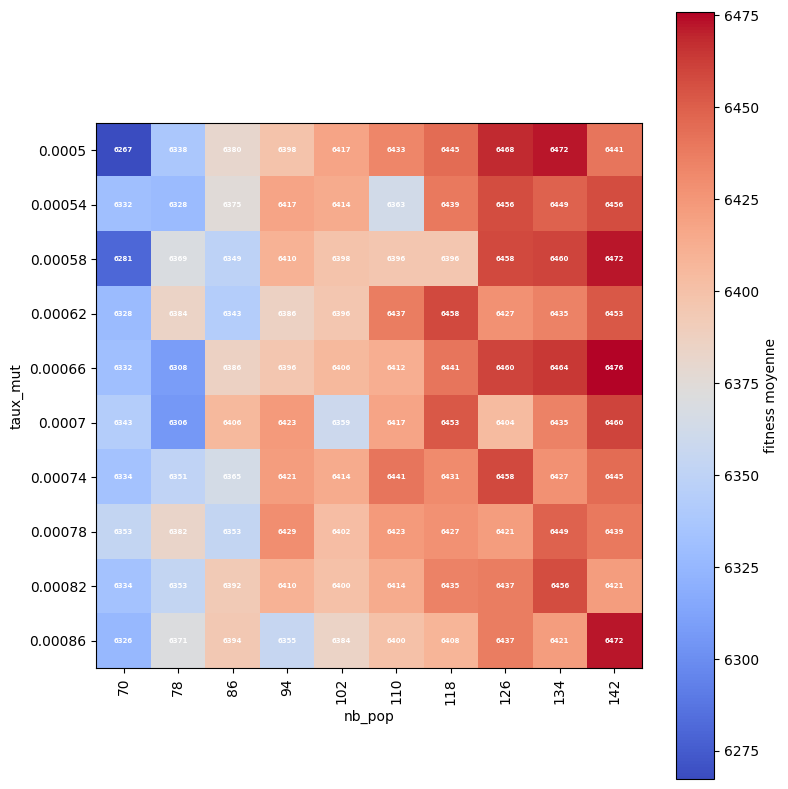

In [ ]:
nb_iter = 100
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(70,150,8)
title = ""
avg = []

iterator2 = np.arange(0.0005,0.0009,0.00004)
iterator2 = [round(x, 7) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_13_10000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 40/40 [05:42<00:00,  8.56s/batch]


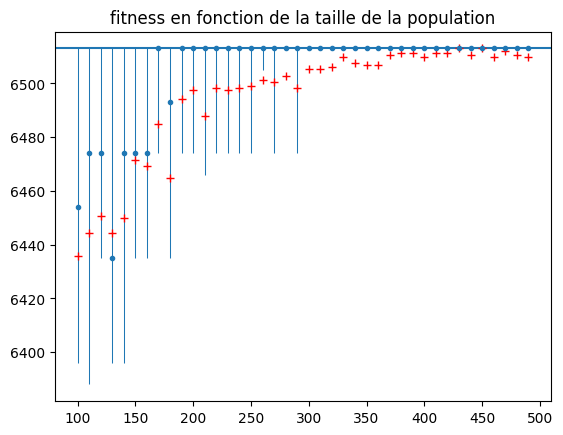

In [ ]:
nb_iter = 100
nb_pop = 0
mutation_rate = 0.00055

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(100,500,10)
title = "fitness en fonction de la taille de la population"

test = Testor(Genetique_solver(sad_13_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_13_10000,title)

### 10000-13-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 12/12 [00:23<00:00,  1.94s/batch]


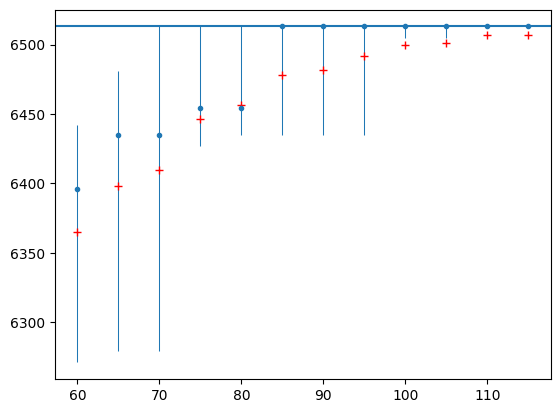

calcul: 100%|██████████| 12/12 [00:27<00:00,  2.33s/batch]


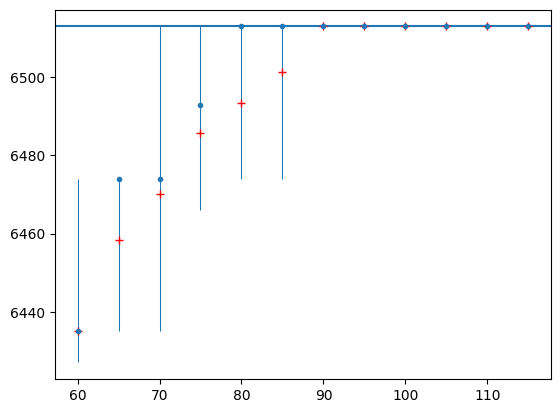

In [ ]:
nb_iter = 0
nb_pop = 200
mutation_rate = 0.00055

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(60,120,5)
title = ""

test = Testor(Genetique_solver(sad_13_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_13_10000,title)

### 10000-13-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [ ]:
nb_iter = 100
nb_pop = 200
mutation_rate = 0.00055

times = []
fit = []
for i in range(10):
    clock_start = time.time()
    solver = Genetique_solver(sad_13_10000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))
print("fitness moyenne :", np.mean(fit))

temps d'exécution moyen : 0.459840989112854
temps d'exécution médian : 0.4499690532684326
temps d'exécution max : 0.511193037033081
temps d'exécution min : 0.44040846824645996
temps d'exécution écart type : 0.021399980236529226
fitness moyenne : 6489.6

temps d'exécution moyen : 1.1916673517227172
temps d'exécution médian : 1.186038851737976
temps d'exécution max : 1.2542881965637207
temps d'exécution min : 1.1651668548583984
temps d'exécution écart type : 0.018678553810402336
fitness moyenne : 6509.88


## Data n°15

### 10000-15-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 9/9 [00:13<00:00,  1.47s/batch]


matrix =  [[4817.7, 4822.65, 4826.4, 4827.6, 4828.65, 4827.9, 4830.0, 4830.0, 4829.55], [4829.55, 4831.5, 4831.8, 4833.3, 4833.45, 4835.4, 4835.1, 4834.65, 4836.15], [4830.0, 4834.8, 4836.45, 4837.2, 4837.65, 4838.7, 4837.65, 4838.1, 4840.2], [4830.45, 4838.55, 4837.65, 4837.95, 4841.85, 4840.05, 4841.55, 4842.3, 4841.85], [4829.4, 4839.6, 4839.45, 4841.4, 4843.05, 4841.7, 4842.75, 4844.85, 4843.5], [4823.1, 4838.55, 4840.35, 4841.25, 4843.65, 4843.95, 4843.2, 4846.35, 4844.7], [4819.65, 4838.55, 4845.15, 4843.05, 4845.15, 4846.5, 4846.05, 4845.9, 4845.3], [4802.7, 4834.8, 4841.55, 4843.65, 4844.7, 4845.45, 4845.3, 4847.1, 4846.5], [4789.95, 4833.15, 4841.7, 4843.8, 4846.05, 4843.65, 4846.05, 4847.85, 4848.15], [4792.95, 4825.65, 4840.35, 4842.3, 4847.85, 4845.45, 4849.35, 4846.5, 4846.65], [4754.55, 4817.85, 4836.0, 4841.25, 4844.7, 4845.0, 4846.95, 4849.35, 4849.35]]
x_ticks =  [20, 40, 60, 80, 100, 120, 140, 160, 180]
y_ticks =  [0.0, 0.0003, 0.0006, 0.0009, 0.0012, 0.0015, 0.0018, 

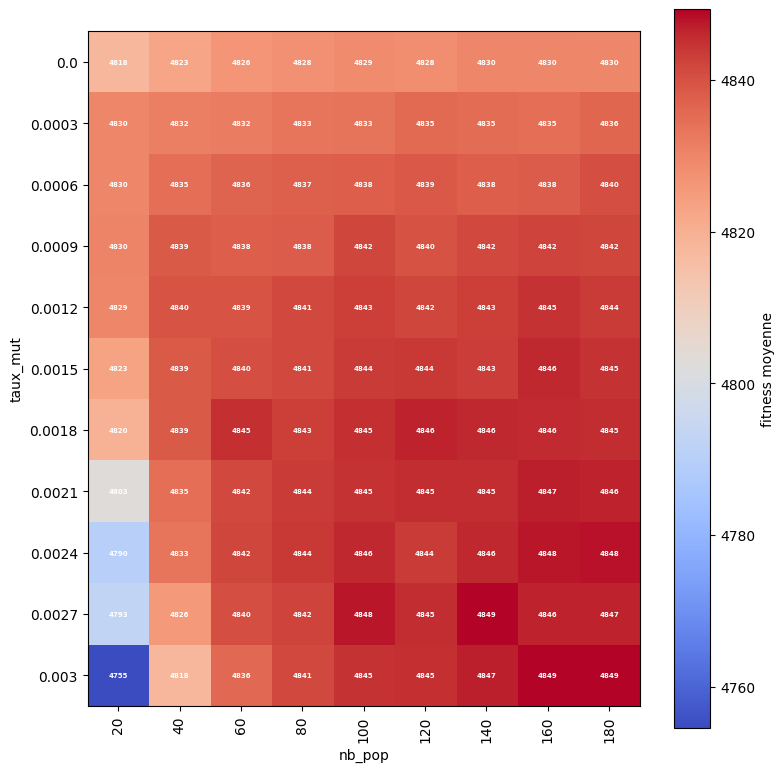

In [ ]:
nb_iter = 100
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(20,200,20)
title = ""
avg = []

iterator2 = np.arange(0,0.003,0.0003)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad_15_10000,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 28/28 [00:26<00:00,  1.07batch/s]


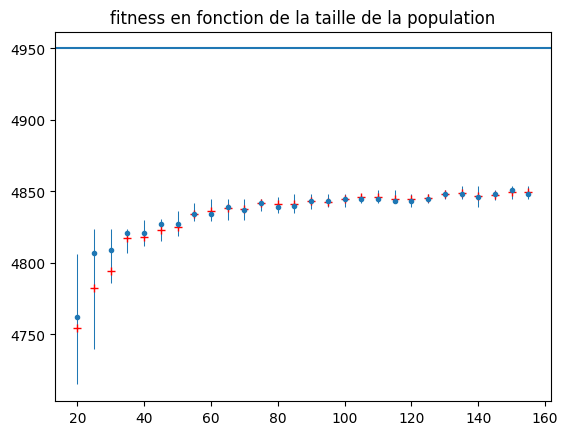

In [ ]:
nb_iter = 100
nb_pop = 0
mutation_rate = 0.003

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(20,160,5)
title = "fitness en fonction de la taille de la population"

test = Testor(Genetique_solver(sad_15_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_15_10000,title)

### 10000-15-iter
Variation du nombre d'iteration en partant des parametre de population et de mutation determiné plus haut.

[<-- Sommaire](#sommaire)

calcul: 100%|██████████| 40/40 [00:49<00:00,  1.24s/batch]


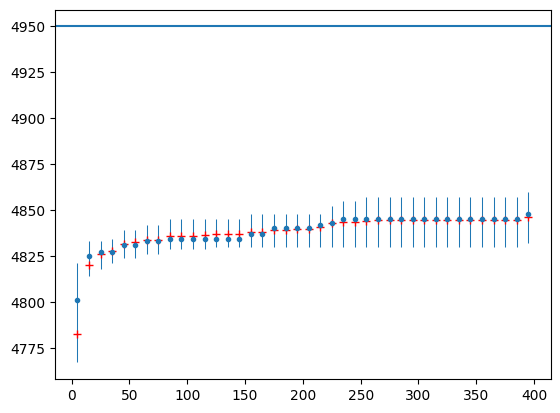

In [ ]:
nb_iter = 0
nb_pop = 60
mutation_rate = 0.003

group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(5,400,10)
title = ""

test = Testor(Genetique_solver(sad_15_10000,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti_15_10000,title)

### 10000-15-time
calcul du temps d'execution avec les paramètres choisis

[<-- Sommaire](#sommaire)

In [ ]:
nb_iter = 230
nb_pop = 60
mutation_rate = 0.003

fit = []
times = []
for i in range(100):
    clock_start = time.time()
    solver = Genetique_solver(sad_15_10000,nb_iter,nb_pop,mutation_rate,i,"classic")
    solver.solve()
    fit.append(solver.sad.bestFitness)
    times.append(time.time()-clock_start)

print("temps d'exécution moyen :",np.mean(times))
print("temps d'exécution médian :",np.median(times))
print("temps d'exécution max :",np.max(times))
print("temps d'exécution min :",np.min(times))
print("temps d'exécution écart type :",np.std(times))
print("fitness moyenne :", np.mean(fit))

temps d'exécution moyen : 0.3324978971481323
temps d'exécution médian : 0.3310716152191162
temps d'exécution max : 0.37195849418640137
temps d'exécution min : 0.30655360221862793
temps d'exécution écart type : 0.010943941765282598
fitness moyenne : 4838.52
